In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_excel('IG 2023-2024.xlsx', index_col='Заказ №')
df.head()

,Дата публикации тендера,Дата создания тендера,Дата обновления тендера,Этап размещения заказа,Способ размещения заказа,Категория закупки,Федеральный округ,Регион размещения заказа,Административный округ,Муниципальный уровень,...,Цена за упаковку (контракт),Средняя цена за упак. (контракт),"Наименование поставщика (исполнителя, подрядчика) по контракту","ИНН поставщика (исполнителя, подрядчика) по контракту","КПП Поставщика (исполнителя, подрядчика) по контракту",Общая сумма контракта (руб),Фактически оплачено,"Неустойка (штрафы, пени)",Ссылка на контракт,ProductIdNx
Заказ №,,,,,,,,,,,,,,,,,,,,,
№ 0321200022024001891,2024-12-29 14:10:00,2024-12-29 14:43:45.227,2025-01-21 08:12:42.263,размещение завершено,запрос котировок (цен) в электронной форме,Госпитальные закупки,Северо-кавказский ФО,Ставропольский край,NaN,г. Ставрополь,...,38900.00,36997.59,ООО НОРДФАРМ,ИНН 9718009253,КПП 771801001,2334000.00,0.00,НЕТ,https://zakupki.gov.ru/epz/contract/contractCa...,230668479.00
№ 0321200032624000663,2024-12-28 18:29:00,2024-12-28 18:36:16.070,2025-01-28 08:10:28.383,размещение завершено,открытый аукцион в электронной форме,Госпитальные закупки,Северо-кавказский ФО,Ставропольский край,NaN,г. Ставрополь,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
№ 0510500001024000224,2024-12-28 17:58:00,2024-12-28 18:07:30.220,2025-01-23 10:56:56.093,размещение отменено,открытый аукцион в электронной форме,NaN,Северо-кавказский ФО,Республика Северная Осетия,NaN,г. ВЛАДИКАВКАЗ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
№ 0510500001024000224,2024-12-28 17:58:00,2024-12-28 18:07:30.220,2025-01-23 10:56:56.093,размещение отменено,открытый аукцион в электронной форме,NaN,Северо-кавказский ФО,Республика Северная Осетия,NaN,г. ВЛАДИКАВКАЗ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
№ 0303300012124000279,2024-12-28 17:12:00,2024-12-28 17:38:07.167,2025-01-29 20:44:04.097,размещение завершено,открытый аукцион в электронной форме,Госпитальные закупки,Северо-кавказский ФО,Республика Дагестан,NaN,г. Кизляр,...,7354.04,5497.28,ООО Алпи-Фарм,ИНН 9718083024,КПП 771801001,147080.80,0.00,НЕТ,https://zakupki.gov.ru/epz/contract/contractCa...,230729666.00


In [4]:
# Проверка уникальных ТН и фасовок 
column_name = ['Торговое наименование (контракт)','Дозировка + Фасовка (контракт)'] 
for column in column_name: 
    print(column)
    print(df[column].unique())

Торговое наименование (контракт)
['БиоГам Иммуноглобулин человека нормальный хроматографически очищенный'
 nan 'Иммуновенин' 'Иммуноглобулин Сигардис МТ' 'Привиджен'
 'Иммуноглобулин человека нормальный' 'Имбиоглобулин' '~' 'Гамунекс-С'
 'Октагам 10%' 'ПАНЗИГА' 'Кутаквиг' 'Габриглобин-IgG'
 'Иммуноглобулин Сигардис' 'Октагам' 'И.Г.Вена' 'Гамманорм' 'Интратект']
Дозировка + Фасовка (контракт)
['10% 50 мл №1' nan '25 мл №1' '5% 100 мл №1' '5% 25 мл №1' '1.5 мл №10'
 '5% 50 мл №1' '10% 25 мл №1' 'не определено' '10% 100 мл №1'
 '10% 300 мл №1' '165 мг/мл 24 мл №20' '165 мг/мл 48 мл (8 г) №10'
 '3 мл №10' '5% 10 мл №1' '165 мг/мл 48 мл (8 г) №1'
 '165 мг/мл 12 мл (2 г) №20' '165 мг/мл 6 мл (1 г) №10'
 '165 мг/мл 24 мл №1' '5% 20 мл №1' '10% 20 мл №1' '5% 200 мл №1'
 '10% 200 мл №1' '165 мг/мл 20 мл №1']


In [5]:
# Фильтрация нужных колонок и отменных/ неоконченных аукционов
def filter_data(df: pd.DataFrame) -> pd.DataFrame:
    columns= [
        'Дата публикации тендера',
          'Этап размещения заказа',
          'Способ размещения заказа',
          'Категория закупки',
          'Регион размещения заказа',
          'Заказчик',
          'Тип организации',
          'Тип лота',
          'Тип учреждения',
          'Источник финансирования заказа',
          'Федеральный закон',
          'Победитель тендера',
          'Не имеет победителя',
          'Международное непатентованное наименование',
          'Торговое наименование (контракт)',
          'Производитель (контракт)',
          'Дозировка + Фасовка (контракт)',
          'Сумма за ед. по контракту (руб)',
          'Количество упаковок (контракт)',
          'Цена за упаковку (контракт)']
       
    df = df[columns]
    df = df[(df['Не имеет победителя'] == 'НЕТ') & (df['Этап размещения заказа'] != 'размещение отменено') & (df['Победитель тендера'].notna())]
    df = df.drop_duplicates()
    return df

In [6]:
# Преобразование дат, заполнение пропусков и замена неверных значений
def cleaning_data(df: pd.DataFrame) -> pd.DataFrame:
        def data_time(x):
                x['Дата публикации тендера'] = pd.to_datetime (x['Дата публикации тендера'], format = '%Y.%m.%d')
                x['Дата'] = x['Дата публикации тендера'].dt.date
                x['Год'] = x['Дата публикации тендера'].dt.year.astype(int)
                return x
        df = data_time (df)

        def cleaning_categorial (x):
                 # Заполнение пропусков и исправление неверно заполненных значение в ТН , дозировках.
                x[['Категория закупки','Тип организации', 'Производитель (контракт)','Торговое наименование (контракт)', 'Дозировка + Фасовка (контракт)']] = \
                x[['Категория закупки','Тип организации','Производитель (контракт)','Торговое наименование (контракт)','Дозировка + Фасовка (контракт)']].fillna('не определено')

                x['Торговое наименование (контракт)'] = x['Торговое наименование (контракт)']\
                                        .replace('Иммуноглобулин Сигардис','Иммуноглобулин Сигардис МТ')\
                                        .replace('Октагам 10%', 'не определено') \
                                        .replace('Октагам', 'не определено')\
                                        .replace('БиоГам Иммуноглобулин человека нормальный хроматографически очищенный', 'БиоГам')\
                                        .replace('Иммуноглобулин человека нормальный', 'ИГЧН')
                x['Дозировка + Фасовка (контракт)'] =  x['Дозировка + Фасовка (контракт)'] \
                                        .replace('5% 10 мл №1', 'не определено')\
                                        .replace('5% 20 мл №1','не определено') \
                                        .replace('10% 20 мл №1','не определено') \
                                        .replace('25 мл №1', '5% 25 мл №1')\
                                        .replace('10% 200 мл №1','не определено')

                x['Дозировка + Фасовка (контракт)'] = x.apply(
                        lambda row : '5% 25 мл №1' 
                        if row['Торговое наименование (контракт)'] in ['Иммуновенин'] 
                        and row['Дозировка + Фасовка (контракт)'] == 'не определено'
                        else row['Дозировка + Фасовка (контракт)'],  axis=1)

                x['Дозировка + Фасовка (контракт)'] = x.apply(
                        lambda row : '5% 50 мл №1' 
                        if row['Торговое наименование (контракт)'] in ['Имбиоглобулин'] 
                        and row['Дозировка + Фасовка (контракт)'] == 'не определено'
                        else row['Дозировка + Фасовка (контракт)'],  axis=1)

                # Дополнительно добавляем признак с дозировкой
                x['Дозировка %'] = x['Дозировка + Фасовка (контракт)'].apply (lambda x: '5%' if x.__contains__('5%') else ('10%' if x.__contains__('10%') else 'не определено'))
                return x
        df = cleaning_categorial (df)
        return df

In [7]:
def cleaning_tn (df: pd.DataFrame) -> pd.DataFrame:
        # Отсекаем недостоверные дозировки и ТН
        tn_list = ['Привиджен', 'Имбиоглобулин', 'Иммуноглобулин Сигардис МТ',
                        'ПАНЗИГА', 'Иммуновенин', 'Иммуноглобулин человека нормальный',
                        'Иммуноглобулин Сигардис', 'Габриглобин-IgG', 'Октагам 10%',
                        'И.Г.Вена', 'не определено', 'БиоГам Иммуноглобулин человека нормальный хроматографически очищенный',
                        'ИГЧН', 'БиоГам']

        doses_list =  ['10% 100 мл №1', '5% 50 мл №1','5% 100 мл №1','25 мл №1',
                        '5% 25 мл №1','не определено','10% 25 мл №1','10% 50 мл №1',
                        '10% 300 мл №1','5% 20 мл №1','10% 20 мл №1','5% 10 мл №1',
                        '5% 200 мл №1','10% 200 мл №1']

        df = df[df['Торговое наименование (контракт)'].isin(tn_list)]
        df = df[df['Дозировка + Фасовка (контракт)'].isin(doses_list)]
        return df

In [8]:
def cleaning_price (df: pd.DataFrame) -> pd.DataFrame:
    # Очиста незаполненных строк для анализа цен
    df = df.dropna(subset=['Цена за упаковку (контракт)','Количество упаковок (контракт)','Сумма за ед. по контракту (руб)'])
    df = df.drop((df[df['Цена за упаковку (контракт)'] == 0]).index)
    return df

In [ ]:
def pipeline(df: pd.DataFrame) -> pd.DataFrame:
    for func in [filter_data, cleaning_data, cleaning_tn, cleaning_price]:
        df = func(df) 
    return df

In [10]:
# Запуск конвейера
df = pipeline(df)
df.head()

,Дата публикации тендера,Этап размещения заказа,Способ размещения заказа,Категория закупки,Регион размещения заказа,Заказчик,Тип организации,Тип лота,Тип учреждения,Источник финансирования заказа,...,Международное непатентованное наименование,Торговое наименование (контракт),Производитель (контракт),Дозировка + Фасовка (контракт),Сумма за ед. по контракту (руб),Количество упаковок (контракт),Цена за упаковку (контракт),Дата,Год,Дозировка %
Заказ №,,,,,,,,,,,,,,,,,,,,,
№ 0321200022024001891,2024-12-29 14:10:00,размещение завершено,запрос котировок (цен) в электронной форме,Госпитальные закупки,Ставропольский край,ГБУЗ Ставропольского края Ставропольская краев...,Бюджетное учреждение,Монолот,ЛПУ,ФОМС,...,Иммуноглобулин человека нормальный,БиоГам,МИКРОГЕН НПО ФГУП,10% 50 мл №1,2334000.00,60.00,38900.00,2024-12-29,2024,10%
№ 0303300012124000279,2024-12-28 17:12:00,размещение завершено,открытый аукцион в электронной форме,Госпитальные закупки,Республика Дагестан,ГБУ РД Кизлярская центральная городская больница,Бюджетное учреждение,Монолот,ЛПУ,ФОМС,...,Иммуноглобулин человека нормальный,Иммуновенин,МИКРОГЕН НПО ФГУП,5% 25 мл №1,147080.80,20.00,7354.04,2024-12-28,2024,5%
№ 0744200000224010292,2024-12-28 15:08:00,размещение завершено,открытый аукцион в электронной форме,Госпитальные закупки,Курская область,ОБУЗ Курская областная многопрофильная клиниче...,Бюджетное учреждение,Монолот,ЛПУ,ФОМС,...,Иммуноглобулин человека нормальный,Иммуноглобулин Сигардис МТ,СЫЧУАНЬ ЮАНДА ШУЯН,5% 100 мл №1,1723920.00,80.00,21549.00,2024-12-28,2024,5%
№ 0142200001324033266,2024-12-28 13:49:00,размещение завершено,запрос котировок (цен) в электронной форме,Льготные закупки,Самарская область,ГКУ Самарской области Самарафармация,Казенное учреждение,Монолот,Фармация,Межбюджетные трансферты,...,Иммуноглобулин человека нормальный,Привиджен,СИЭСЭЛ БЕРИНГ,10% 50 мл №1,3975642.00,108.00,36811.50,2024-12-28,2024,10%
№ 0863500000624001219,2024-12-28 12:42:00,размещение завершено,открытый аукцион в электронной форме,Госпитальные закупки,Смоленская область,Множественные заказчики,не определено,Монолот,ЛПУ,Средства бюджетного учреждения,...,Иммуноглобулин человека нормальный,ИГЧН,МИКРОГЕН НПО ФГУП,5% 25 мл №1,97623.00,17.23,5665.87,2024-12-28,2024,5%


In [11]:
print(f'Количество дубликатов в df: {df.duplicated().sum()}')
print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))
missing_values = ((df.isna().sum()/len(df))*100).sort_values(ascending=False)
print('Процент пропущенных значений:\n', missing_values[missing_values > 0])

Количество дубликатов в df: 0
Количество полностью заполненных объектов из всей выборки: 6917
Процент полностью заполненных объектов из всей выборки: 100.0
Процент пропущенных значений:
 Series([], dtype: float64)


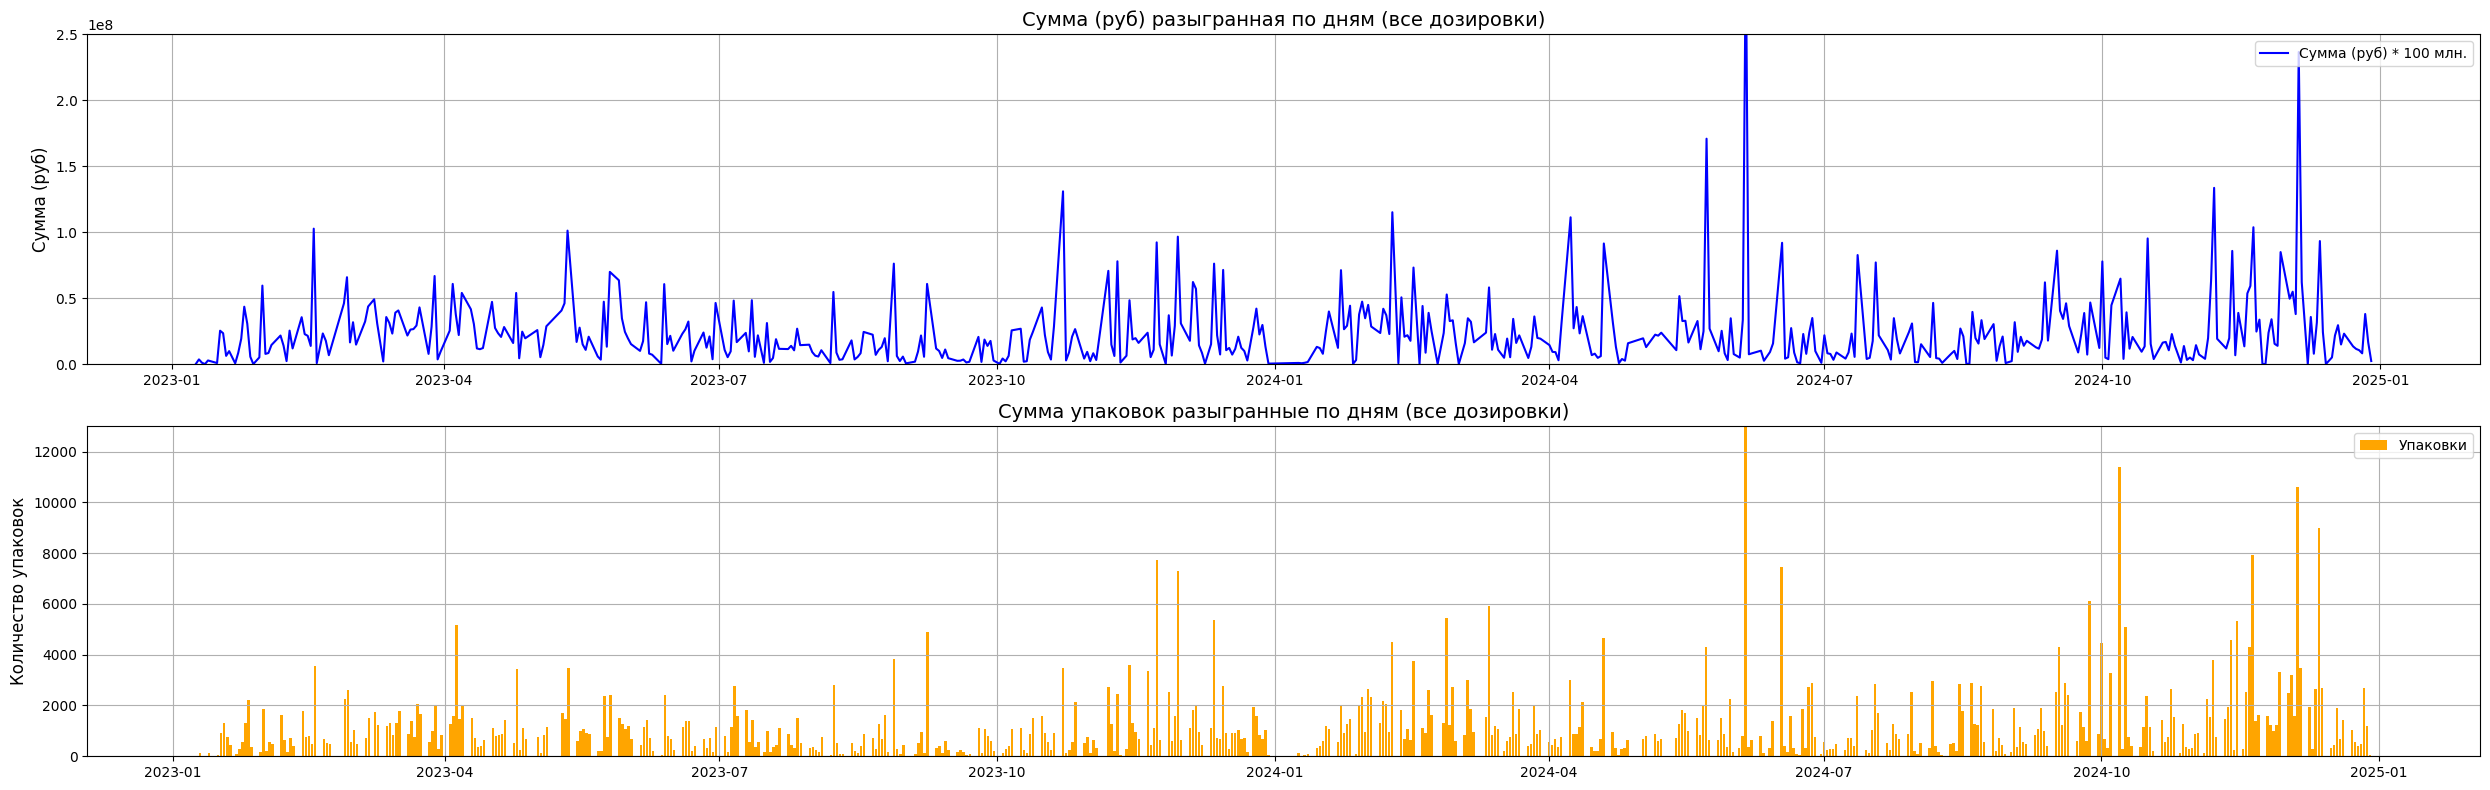

In [12]:
df_data = df.groupby(by=['Дата'], as_index=False).agg({'Сумма за ед. по контракту (руб)': 'sum', 'Количество упаковок (контракт)': 'sum'})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8))

# Линейный график (сумма по дням)
ax1.plot(df_data['Дата'], df_data['Сумма за ед. по контракту (руб)'], linestyle='-', color='b', label='Сумма (руб) * 100 млн.')
ax1.set_title('Сумма (руб) разыгранная по дням (все дозировки)', fontsize=14)
ax1.set_ylabel('Сумма (руб)', fontsize=12)
ax1.grid(True)
ax1.set_ylim(0, 250000000)
ax1.legend(loc='upper right', fontsize=10)

# Столбчатый график (сумма упаковок)
ax2.bar(df_data['Дата'], df_data['Количество упаковок (контракт)'], color='orange', label='Упаковки')
ax2.set_title('Сумма упаковок разыгранные по дням (все дозировки)', fontsize=14)
ax2.set_ylabel('Количество упаковок', fontsize=12)
ax2.grid(True)
ax2.set_ylim(0, 13000)
ax2.legend(loc='upper right', fontsize=10)

# Отображение графиков
plt.tight_layout()
plt.show()

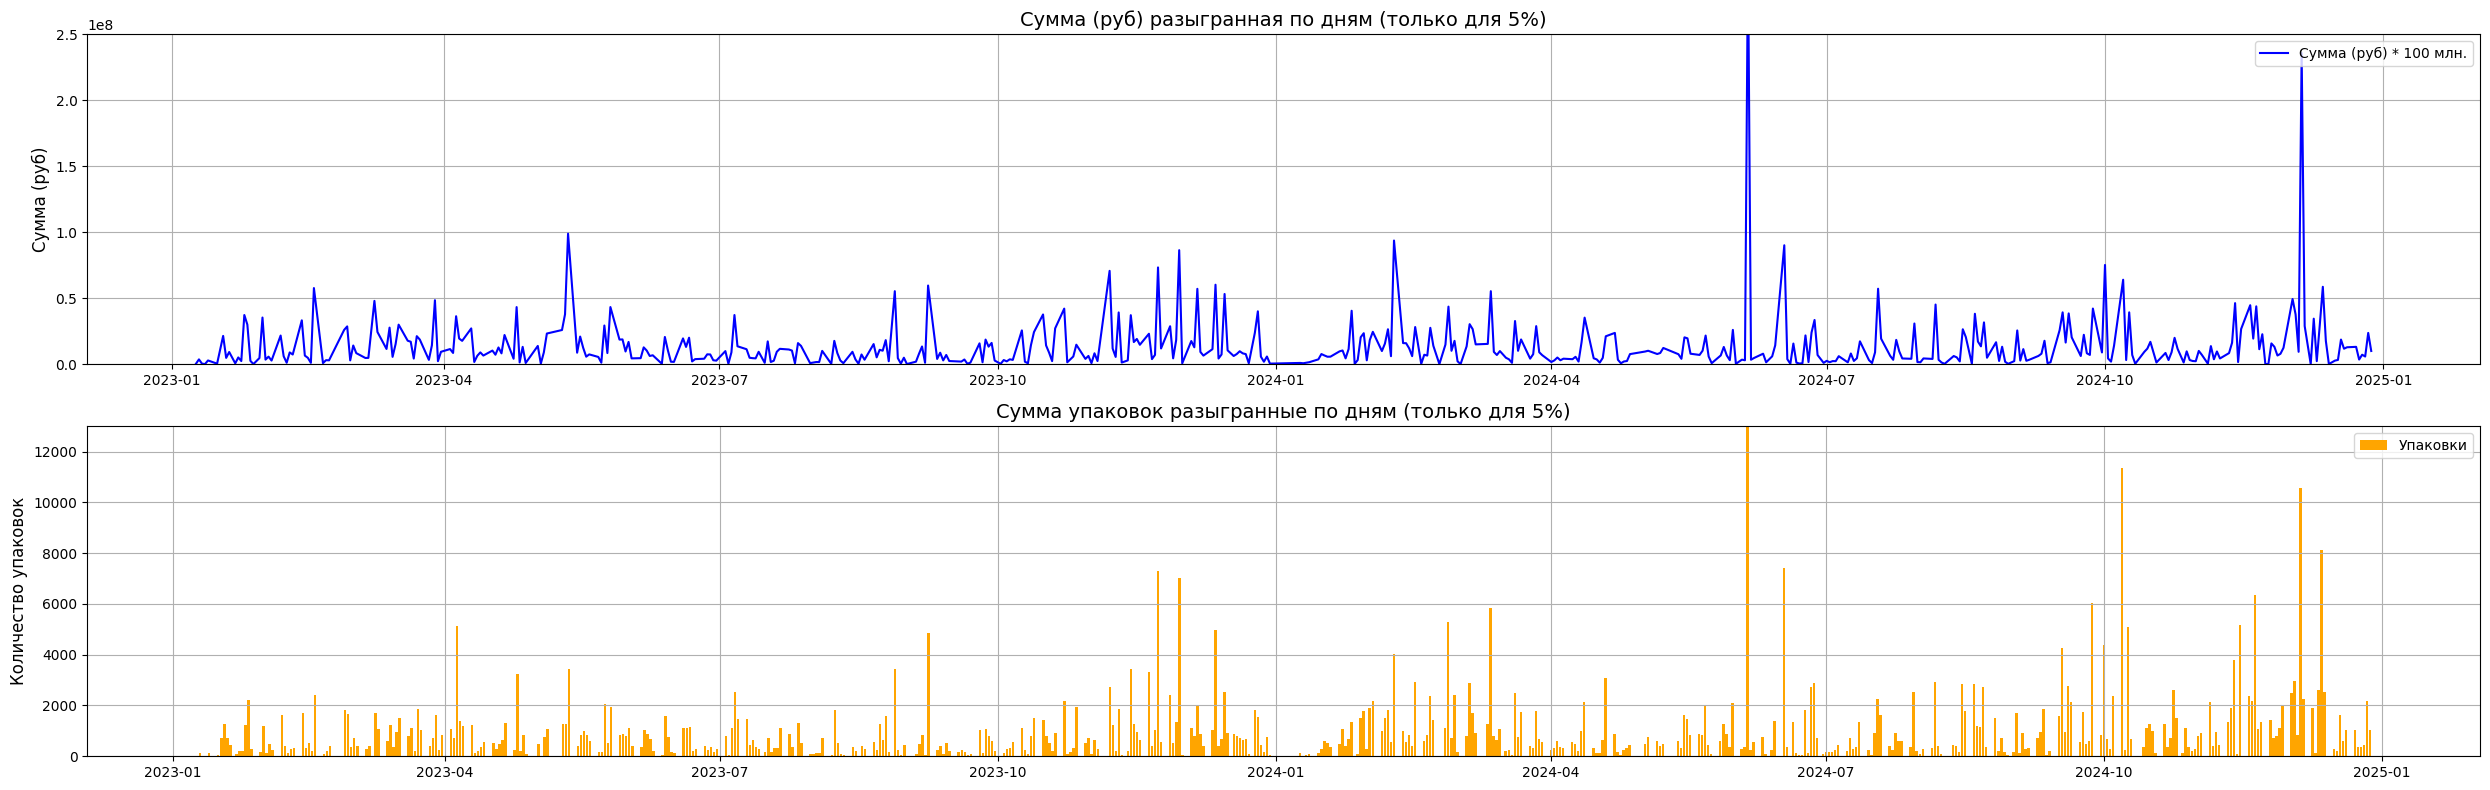

In [13]:
df_data = df.groupby(by=['Дата','Дозировка %'], as_index=False).agg({'Сумма за ед. по контракту (руб)': 'sum', 'Количество упаковок (контракт)': 'sum'})
df_data_5proc = df_data[df_data['Дозировка %'] == '5%']
df_data_10proc = df_data[df_data['Дозировка %'] == '10%']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8))

# Линейный график (сумма по дням)
ax1.plot(df_data_5proc['Дата'], df_data_5proc['Сумма за ед. по контракту (руб)'], linestyle='-', color='b', label='Сумма (руб) * 100 млн.')
ax1.set_title('Сумма (руб) разыгранная по дням (только для 5%)', fontsize=14)
ax1.set_ylabel('Сумма (руб)', fontsize=12)
ax1.grid(True)
ax1.set_ylim(0, 250000000)
ax1.legend(loc='upper right', fontsize=10)

# Столбчатый график (сумма упаковок)
ax2.bar(df_data_5proc['Дата'], df_data_5proc['Количество упаковок (контракт)'], color='orange', label='Упаковки')
ax2.set_title('Сумма упаковок разыгранные по дням (только для 5%)', fontsize=14)
ax2.set_ylabel('Количество упаковок', fontsize=12)
ax2.grid(True)
ax2.set_ylim(0, 13000)
ax2.legend(loc='upper right', fontsize=10)

# Отображение графиков
plt.tight_layout()
plt.show()

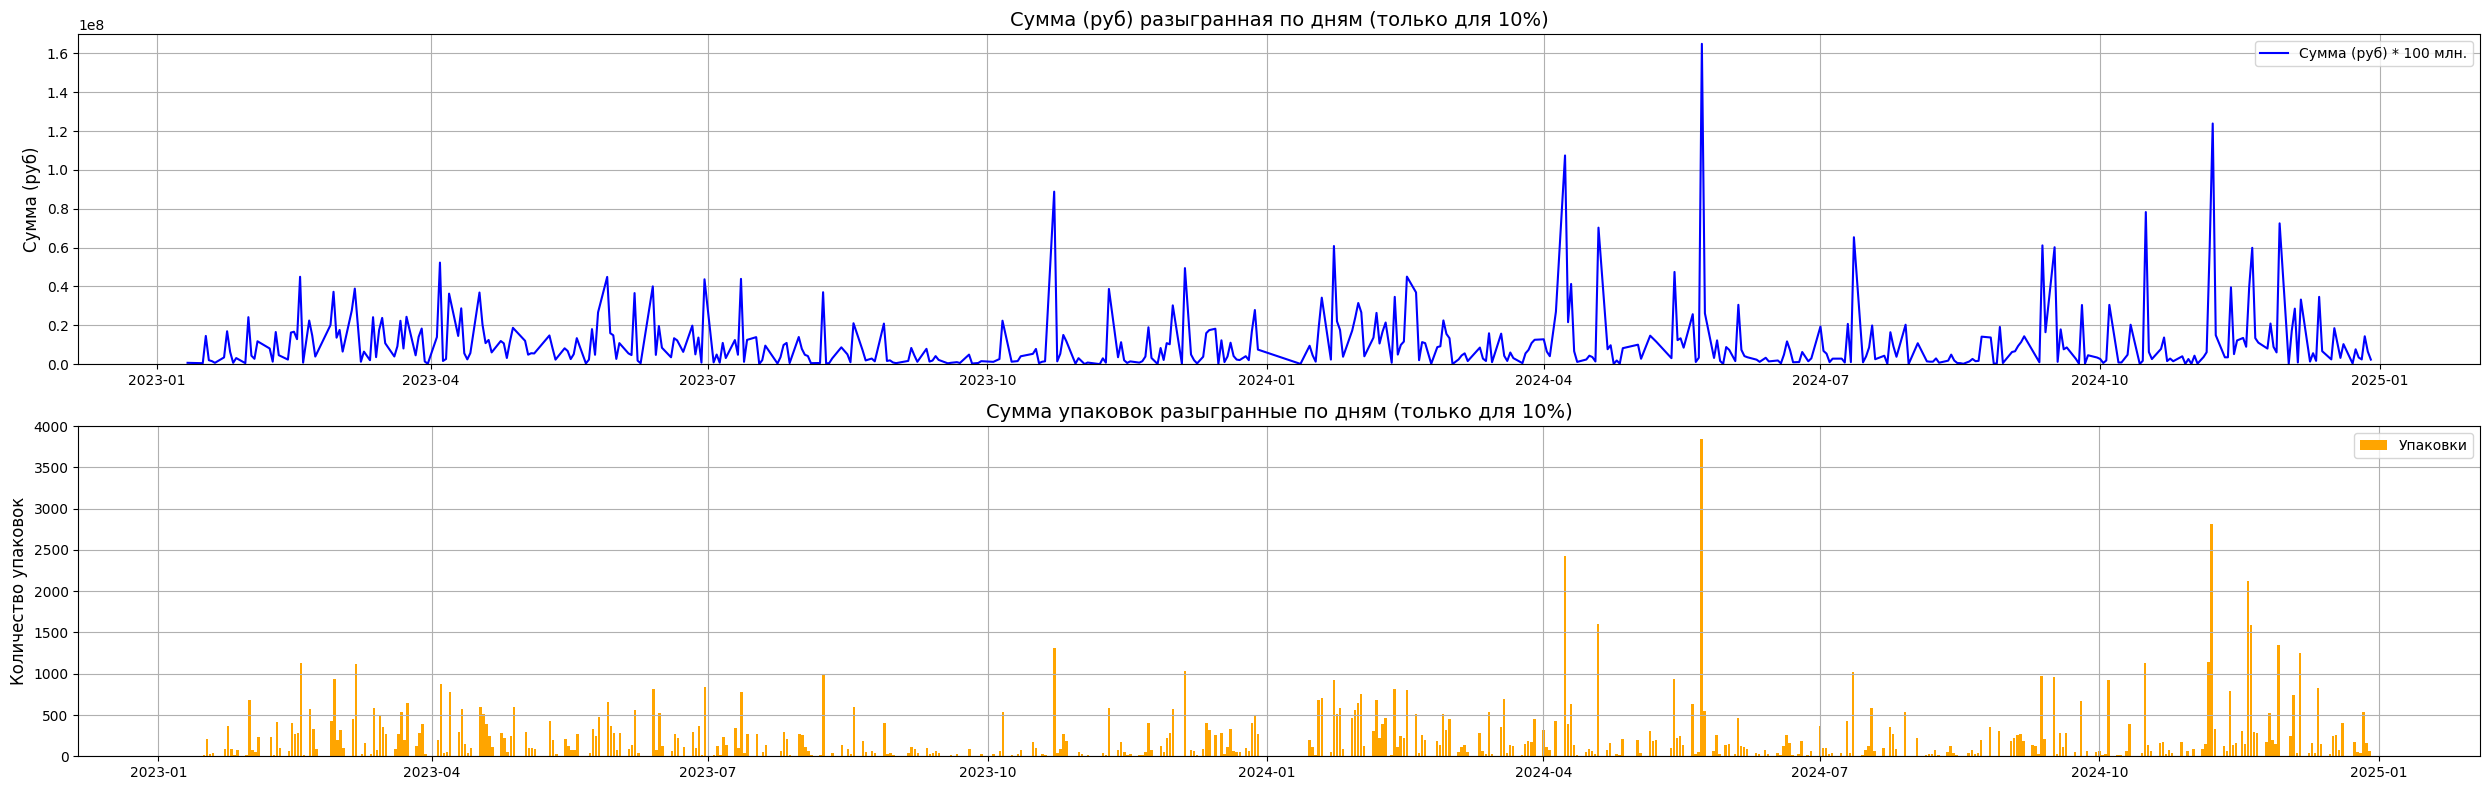

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8))

# Линейный график (сумма по дням)
ax1.plot(df_data_10proc['Дата'], df_data_10proc['Сумма за ед. по контракту (руб)'], linestyle='-', color='b', label='Сумма (руб) * 100 млн.')
ax1.set_title('Сумма (руб) разыгранная по дням (только для 10%)', fontsize=14)
ax1.set_ylabel('Сумма (руб)', fontsize=12)
ax1.grid(True)
ax1.set_ylim(0, 170000000)
ax1.legend(loc='upper right', fontsize=10)

# Столбчатый график (сумма упаковок)
ax2.bar(df_data_10proc['Дата'], df_data_10proc['Количество упаковок (контракт)'], color='orange', label='Упаковки')
ax2.set_title('Сумма упаковок разыгранные по дням (только для 10%)', fontsize=14)
ax2.set_ylabel('Количество упаковок', fontsize=12)
ax2.grid(True)
ax2.set_ylim(0, 4000)
ax2.legend(loc='upper right', fontsize=10)

# Отображение графиков
plt.tight_layout()
plt.show()

In [15]:
# Рассчитываем сумму и долю ИГЧН разыгранного по типам лота
df_type_lot = df.groupby(by=['Год','Тип лота']).agg({'Сумма за ед. по контракту (руб)': 'sum'})
df_type_lot['Доля'] = (df_type_lot['Сумма за ед. по контракту (руб)'] / df_type_lot.groupby(level=0)['Сумма за ед. по контракту (руб)'].transform('sum')) * 100
df_type_lot 

Сумма за ед. по контракту (руб)  Доля
Год  Тип лота                                        
2023 Монолот                      5133572812.38 92.78
     Смешанный                     399715842.50  7.22
2024 Монолот                      6579899217.23 94.93
     Смешанный                     351628424.37  5.07

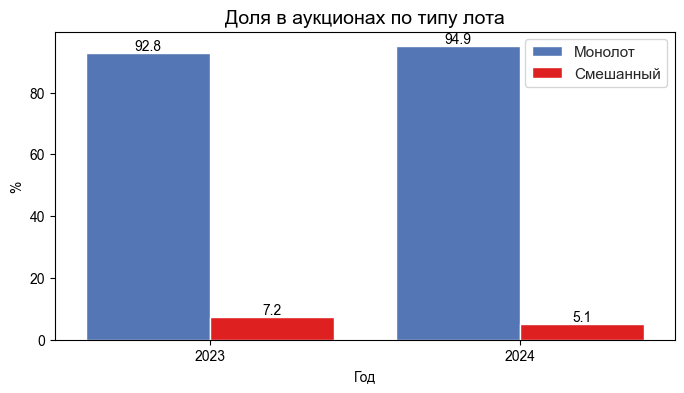

In [16]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(8, 4))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Год', y='Доля', data=df_type_lot , hue='Тип лота',orient='v', palette=['#4472C4','Red'])
# Заголовок
plt.title('Доля в аукционах по типу лота', fontsize=14)
# Название оси X
plt.xlabel('Год', fontsize=10)
# Название оси Y
plt.ylabel('%', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.1f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.1f')
# Место размещения легенды
plt.legend(loc=0)
plt.show()

In [17]:
# Рассчитываем объем , проданного ИГЧН в зависимости от Дозировки (5% и 10%)
df_type_d_proc = df.groupby(by=['Год','Дозировка %']).agg({'Сумма за ед. по контракту (руб)': 'sum'})
df_type_d_proc ['Доля'] = (df_type_d_proc ['Сумма за ед. по контракту (руб)'] / df_type_d_proc.groupby(level=0)['Сумма за ед. по контракту (руб)'].transform('sum')) * 100
df_type_d_proc

Сумма за ед. по контракту (руб)  Доля
Год  Дозировка %                                         
2023 10%                              2266915282.65 40.97
     5%                               3266338247.13 59.03
     не определено                         35125.10  0.00
2024 10%                              3051176627.30 44.02
     5%                               3876330041.96 55.92
     не определено                       4020972.34  0.06

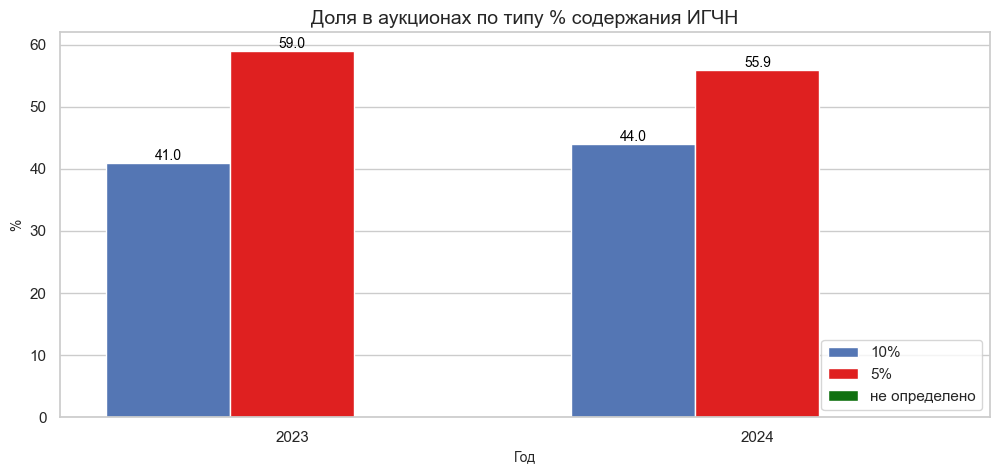

In [18]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(12, 5))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Год', y='Доля', data=df_type_d_proc , hue='Дозировка %',orient='v', palette=['#4472C4','Red','Green'])
# Заголовок
plt.title('Доля в аукционах по типу % содержания ИГЧН', fontsize=14)
# Название оси X
plt.xlabel('Год', fontsize=10)
# Название оси Y
plt.ylabel('%', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.1f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.1f')
# Место размещения легенды
plt.legend(loc=4)
plt.show()

In [19]:
# Объемы реализации по ТН
df_group_TN = df.groupby(by=['Год','Торговое наименование (контракт)']).agg({'Сумма за ед. по контракту (руб)' : 'sum'}).sort_values(by=['Год','Сумма за ед. по контракту (руб)'],ascending=False)
df_group_TN['Доля'] = (df_group_TN['Сумма за ед. по контракту (руб)']/  df_group_TN.groupby(level=0)['Сумма за ед. по контракту (руб)'].transform('sum')) * 100
df_group_TN['Сумма за ед. по контракту (руб)'] = df_group_TN['Сумма за ед. по контракту (руб)'] / 1000000
df_group_TN = df_group_TN.rename(columns={'Сумма за ед. по контракту (руб)':'Сумма (млн.руб)'})
df_group_TN

Сумма (млн.руб)  Доля
Год  Торговое наименование (контракт)                       
2024 Привиджен                                 2365.56 34.13
     Иммуноглобулин Сигардис МТ                1579.22 22.78
     Габриглобин-IgG                            846.27 12.21
     Имбиоглобулин                              672.48  9.70
     ИГЧН                                       599.72  8.65
     не определено                              321.13  4.63
     ПАНЗИГА                                    250.90  3.62
     Иммуновенин                                238.53  3.44
     БиоГам                                      57.70  0.83
2023 Привиджен                                 2236.47 40.42
     Иммуноглобулин Сигардис МТ                2007.86 36.29
     Габриглобин-IgG                            587.03 10.61
     Иммуновенин                                261.24  4.72
     Имбиоглобулин                              214.44  3.88
     ИГЧН                                       192.56  3.48
     ПАНЗИГА                                     26.74  0.48
     И.Г.Вена                                     3.75  0.07
     не определено                                3.18  0.06

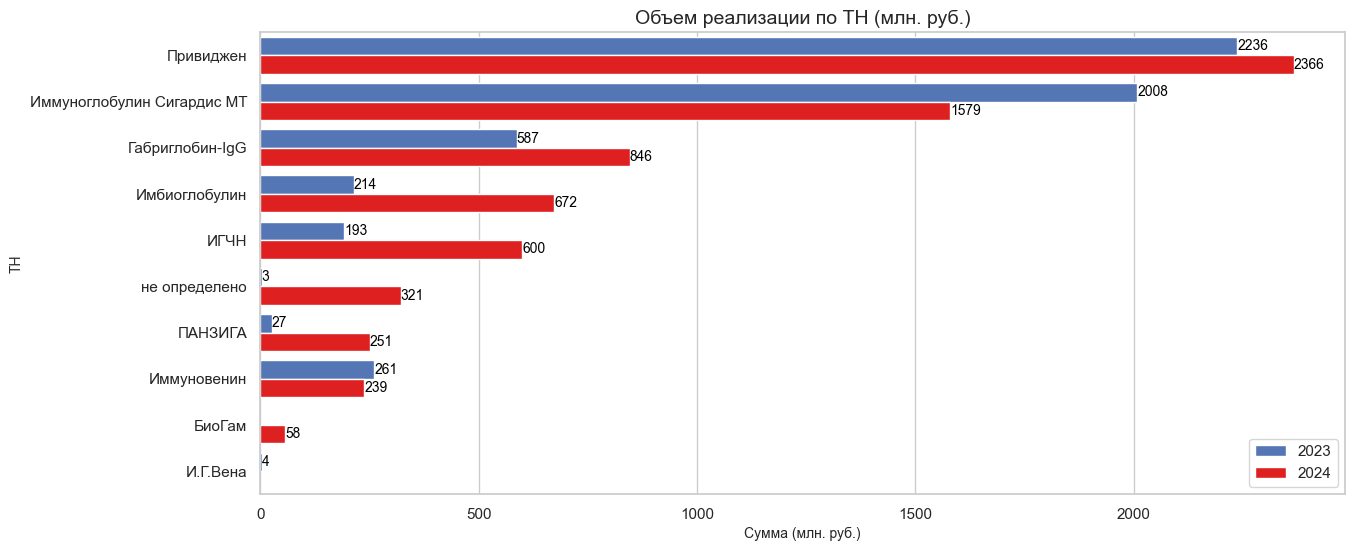

In [20]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(14, 6))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Сумма (млн.руб)', y='Торговое наименование (контракт)', data=df_group_TN , hue='Год',orient='h', palette=['#4472C4','Red'])
# Заголовок
plt.title( 'Объем реализации по ТН (млн. руб.)', fontsize=14)
# Название оси X
plt.xlabel( 'Сумма (млн. руб.)', fontsize=10)
# Название оси Y
plt.ylabel( 'ТН', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.0f')
# Место размещения легенды
plt.legend(loc=4)
plt.show()

In [21]:
# Объемы реализации по дозировке и фасовке
df_group_doses = df.groupby(by=['Год','Дозировка + Фасовка (контракт)']).agg({'Сумма за ед. по контракту (руб)' : 'sum'}).sort_values(by=['Год','Сумма за ед. по контракту (руб)'],ascending=False)
df_group_doses['Доля'] = (df_group_doses['Сумма за ед. по контракту (руб)']/  df_group_doses.groupby(level=0)['Сумма за ед. по контракту (руб)'].transform('sum')) * 100
df_group_doses['Сумма за ед. по контракту (руб)'] = df_group_doses['Сумма за ед. по контракту (руб)'] / 1000000
df_group_doses = df_group_doses.rename(columns={'Сумма за ед. по контракту (руб)':'Сумма (млн.руб)'})
df_group_doses

Сумма (млн.руб)  Доля
Год  Дозировка + Фасовка (контракт)                       
2024 5% 50 мл №1                             1994.59 28.78
     10% 100 мл №1                           1455.58 21.00
     10% 50 мл №1                            1389.10 20.04
     5% 100 мл №1                            1129.91 16.30
     5% 25 мл №1                              751.84 10.85
     10% 25 мл №1                             191.59  2.76
     10% 300 мл №1                             14.90  0.21
     не определено                              4.02  0.06
2023 5% 100 мл №1                            1917.01 34.65
     10% 100 мл №1                           1279.30 23.12
     10% 50 мл №1                             925.96 16.73
     5% 50 мл №1                              878.40 15.87
     5% 25 мл №1                              470.92  8.51
     10% 25 мл №1                              59.35  1.07
     10% 300 мл №1                              2.31  0.04
     не определено                              0.04  0.00

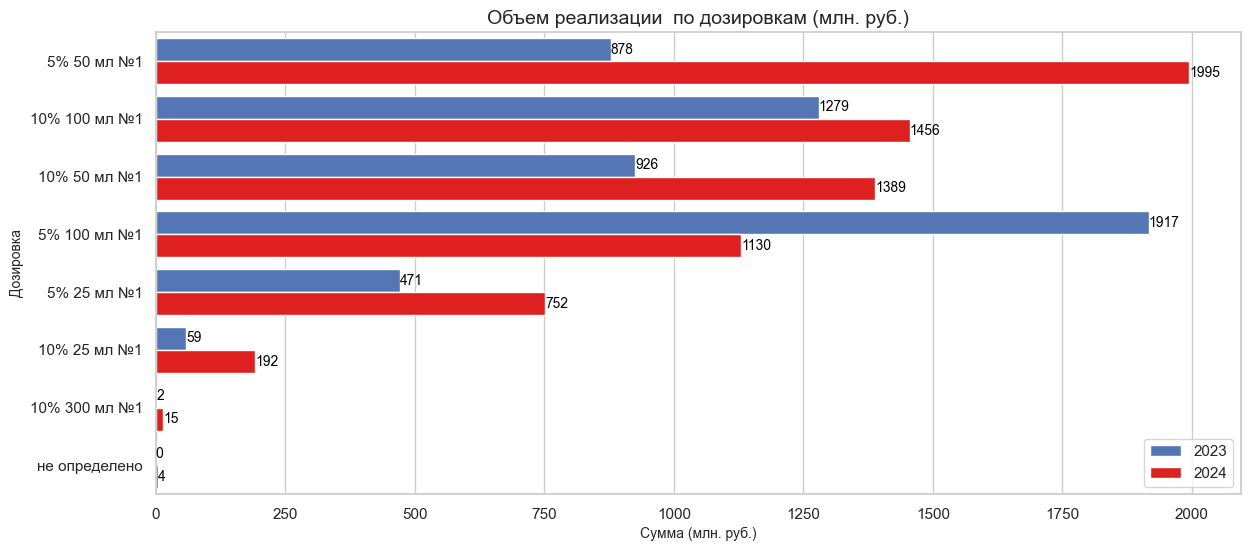

In [22]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(14, 6))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Сумма (млн.руб)', y='Дозировка + Фасовка (контракт)', data=df_group_doses, hue='Год',orient='h', palette=['#4472C4','Red'])
# Заголовок
plt.title( 'Объем реализации  по дозировкам (млн. руб.)', fontsize=14)
# Название оси X
plt.xlabel( 'Сумма (млн. руб.)', fontsize=10)
# Название оси Y
plt.ylabel( 'Дозировка', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.0f')
# Место размещения легенды
plt.legend(loc=4)
plt.show()

In [23]:
# Топ игроков на рынке
df_group_sellers_2024 = df[df['Год'] == 2024].groupby(by=['Год','Дозировка %','Победитель тендера']).agg({'Сумма за ед. по контракту (руб)' : ('sum')}).sort_values(by=['Год','Сумма за ед. по контракту (руб)'],ascending=False)
df_group_sellers_2024 ['Доля'] = (df_group_sellers_2024['Сумма за ед. по контракту (руб)']/  df_group_sellers_2024.groupby(level=0)['Сумма за ед. по контракту (руб)'].transform('sum')) * 100
df_group_sellers_2024['Сумма за ед. по контракту (руб)'] = df_group_sellers_2024['Сумма за ед. по контракту (руб)'] / 1000000
df_group_sellers_2024 = df_group_sellers_2024.rename(columns={'Сумма за ед. по контракту (руб)':'Сумма (млн.руб)'})
df_group_sellers_2024.head (10)

Сумма (млн.руб)  Доля
Год  Дозировка % Победитель тендера                          
2024 10%         ООО МЕДИПАЛ-ОНКО               1746.11 25.19
     5%          ООО НОРДФАРМ                    670.02  9.67
                 ООО Компания Фармстор           601.41  8.68
                 ООО МЕДИПАЛ-ОНКО                489.77  7.07
                 ООО Фармбиопром                 364.12  5.25
                 Неизвестный поставщик           362.27  5.23
     10%         ООО ИРВИН 2                     349.24  5.04
                 ООО МЕДФАРМ                     214.07  3.09
                 АО Фармимэкс                    203.67  2.94
     5%          АО Фирма ЕВРОСЕРВИС             179.07  2.58

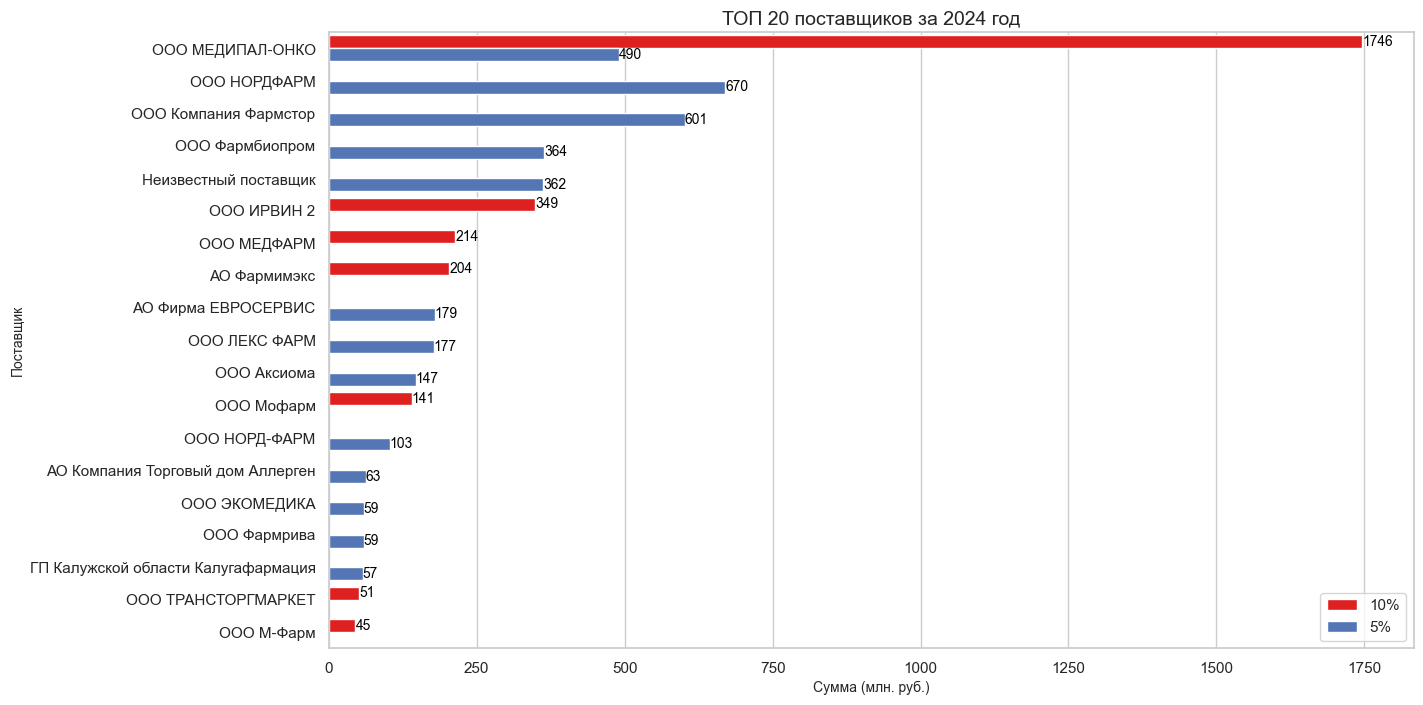

In [24]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(14, 8))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Сумма (млн.руб)', y='Победитель тендера', hue='Дозировка %', data=df_group_sellers_2024[:20],orient='h', palette=['Red','#4472C4'])
# Заголовок
plt.title( 'ТОП 20 поставщиков за 2024 год', fontsize=14)
# Название оси X
plt.xlabel( 'Сумма (млн. руб.)', fontsize=10)
# Название оси Y
plt.ylabel( 'Поставщик', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.0f')
# Место размещения легенды
plt.legend(loc=4)
plt.show()

In [25]:
# Регионы поставки
df_group_regions_2024 = df[df['Год'] == 2024].groupby(by=['Год','Дозировка %','Регион размещения заказа']).agg({'Сумма за ед. по контракту (руб)' : ('sum')}).sort_values(by=['Год','Сумма за ед. по контракту (руб)'],ascending=False)
df_group_regions_2024 ['Доля'] = (df_group_regions_2024['Сумма за ед. по контракту (руб)']/  df_group_regions_2024.groupby(level=0)['Сумма за ед. по контракту (руб)'].transform('sum')) * 100
df_group_regions_2024['Сумма за ед. по контракту (руб)'] = df_group_regions_2024['Сумма за ед. по контракту (руб)'] / 1000000
df_group_regions_2024 = df_group_regions_2024.rename(columns={'Сумма за ед. по контракту (руб)':'Сумма (млн.руб)'})
df_group_regions_2024.head (10)

Сумма (млн.руб)  Доля
Год  Дозировка % Регион размещения заказа                       
2024 5%          Москва                            1062.76 15.33
     10%         Москва                             921.08 13.29
     5%          Нижегородская область              325.40  4.69
                 Московская область                 225.48  3.25
                 Санкт-Петербург                    201.78  2.91
     10%         Краснодарский край                 163.65  2.36
                 Красноярский край                  159.18  2.30
                 Нижегородская область              156.38  2.26
     5%          Республика Татарстан               150.76  2.17
     10%         Республика Татарстан               139.42  2.01

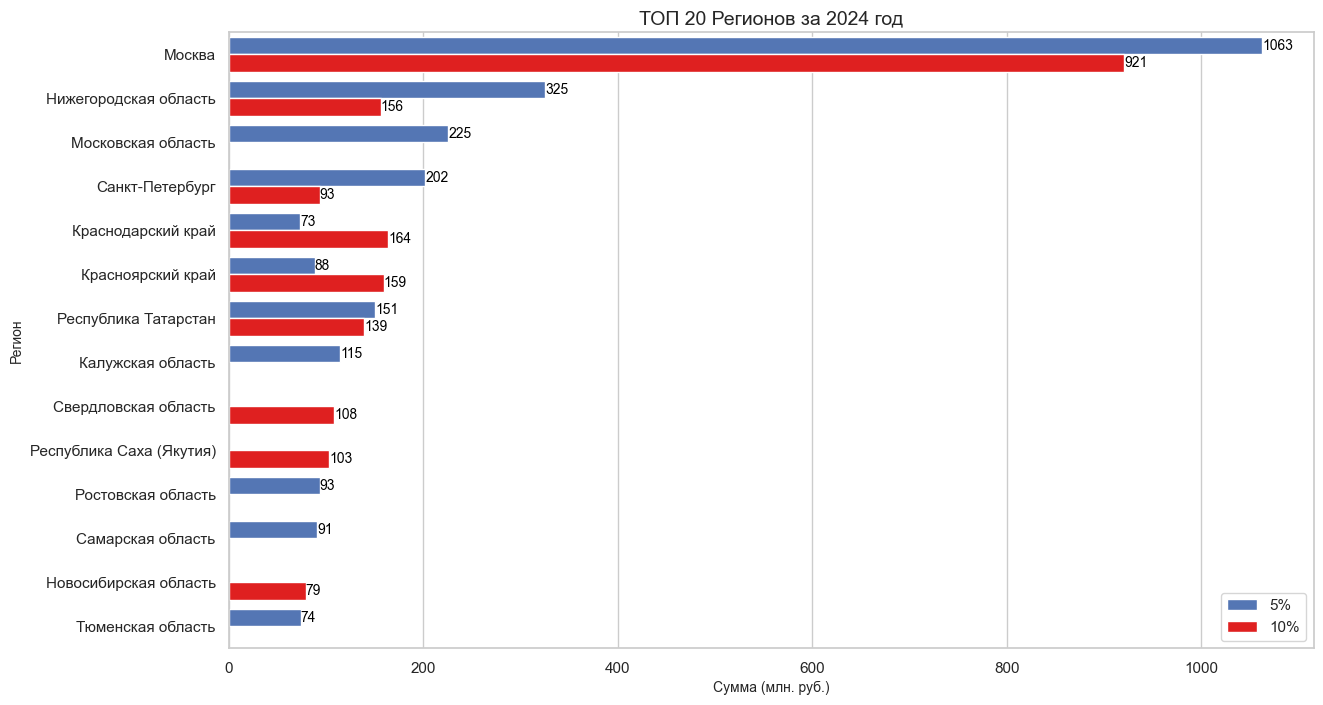

In [26]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(14, 8))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Сумма (млн.руб)', y='Регион размещения заказа', hue='Дозировка %', data=df_group_regions_2024[:20],orient='h', palette=['#4472C4','Red' ])
# Заголовок
plt.title( 'ТОП 20 Регионов за 2024 год', fontsize=14)
# Название оси X
plt.xlabel( 'Сумма (млн. руб.)', fontsize=10)
# Название оси Y
plt.ylabel( 'Регион', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.0f')
# Место размещения легенды
plt.legend(loc=4)
plt.show()

In [27]:
# Топ крупнейших заказчиков
df_group_buyers_2024 = df[df['Год'] == 2024].groupby(by=['Год','Дозировка %','Заказчик']).agg({'Сумма за ед. по контракту (руб)' : ('sum')}).sort_values(by=['Год','Сумма за ед. по контракту (руб)'],ascending=False)
df_group_buyers_2024 ['Доля'] = (df_group_buyers_2024['Сумма за ед. по контракту (руб)']/  df_group_buyers_2024.groupby(level=0)['Сумма за ед. по контракту (руб)'].transform('sum')) * 100
df_group_buyers_2024['Сумма за ед. по контракту (руб)'] = df_group_buyers_2024['Сумма за ед. по контракту (руб)'] / 1000000
df_group_buyers_2024 = df_group_buyers_2024.rename(columns={'Сумма за ед. по контракту (руб)':'Сумма (млн.руб)'})
df_group_buyers_2024.head (10)

Сумма (млн.руб)  \
Год  Дозировка % Заказчик                                                              
2024 5%          ФИЛИАЛ № 1 ГКУ АЗ (КС) ДЗМ                                   619.07   
     10%         ФИЛИАЛ № 1 ГКУ АЗ (КС) ДЗМ                                   336.27   
     5%          ГП НО Нижегородская Областная Фармация                       324.25   
     10%         ФГБУ Федеральный научно-клинический центр детск...           213.33   
                 ГП НО Нижегородская Областная Фармация                       151.38   
     5%          ГБУЗ города Москвы Морозовская детская городска...           134.14   
     10%         Министерство здравоохранения Республики Татарстан            133.93   
                 ГБУЗ города Москвы Морозовская детская городска...           123.28   
     5%          Министерство здравоохранения Республики Татарстан            123.11   
     10%         ФКУ Федеральный центр планирования и организаци...           116.50   

                                                                     Доля  
Год  Дозировка % Заказчик                                                  
2024 5%          ФИЛИАЛ № 1 ГКУ АЗ (КС) ДЗМ                          8.93  
     10%         ФИЛИАЛ № 1 ГКУ АЗ (КС) ДЗМ                          4.85  
     5%          ГП НО Нижегородская Областная Фармация              4.68  
     10%         ФГБУ Федеральный научно-клинический центр детск...  3.08  
                 ГП НО Нижегородская Областная Фармация              2.18  
     5%          ГБУЗ города Москвы Морозовская детская городска...  1.94  
     10%         Министерство здравоохранения Республики Татарстан   1.93  
                 ГБУЗ города Москвы Морозовская детская городска...  1.78  
     5%          Министерство здравоохранения Республики Татарстан   1.78  
     10%         ФКУ Федеральный центр планирования и организаци...  1.68

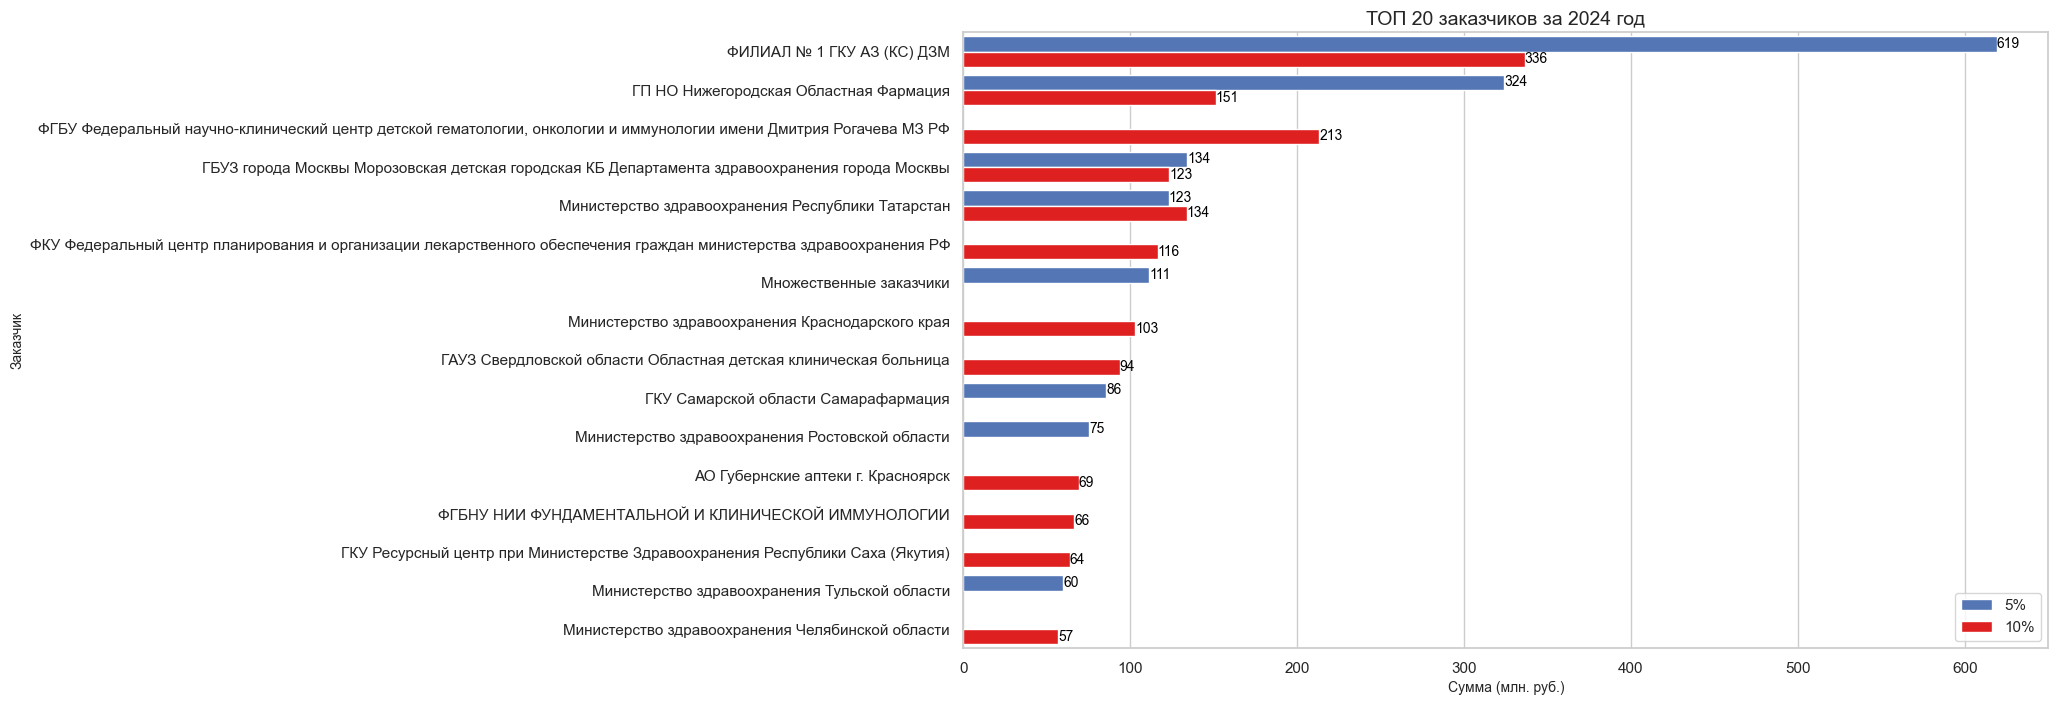

In [28]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(14, 8))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Сумма (млн.руб)', y='Заказчик', hue='Дозировка %', data=df_group_buyers_2024[:20],orient='h', palette=['#4472C4','Red'])
# Заголовок
plt.title( 'ТОП 20 заказчиков за 2024 год', fontsize=14)
# Название оси X
plt.xlabel( 'Сумма (млн. руб.)', fontsize=10)
# Название оси Y
plt.ylabel( 'Заказчик', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.0f')
# Место размещения легенды
plt.legend(loc=4)
plt.show()

In [29]:
# Общая сводная таблица
df_table = pd.pivot_table (df,
                           values='Сумма за ед. по контракту (руб)', 
                           index=['Дозировка %','Торговое наименование (контракт)','Дозировка + Фасовка (контракт)'],
                           columns= 'Год',
                           aggfunc='sum', 
                           fill_value=0,
                           margins=True)
df_table

Год                                                                                    2023  \
Дозировка %   Торговое наименование (контракт) Дозировка + Фасовка (контракт)                 
10%           БиоГам                           10% 50 мл №1                            0.00   
              ИГЧН                             10% 50 мл №1                       538428.00   
              ПАНЗИГА                          10% 100 мл №1                    11577679.00   
                                               10% 300 мл №1                     2306430.00   
                                               10% 50 мл №1                     12859833.00   
              Привиджен                        10% 100 мл №1                  1267721745.92   
                                               10% 25 мл №1                     59351003.65   
                                               10% 50 мл №1                    909400885.68   
              не определено                    10% 100 мл №1                           0.00   
                                               10% 50 мл №1                      3159277.40   
5%            Габриглобин-IgG                  5% 25 мл №1                      19512401.00   
                                               5% 50 мл №1                     567516125.33   
              И.Г.Вена                         5% 50 мл №1                       3754460.00   
              ИГЧН                             5% 25 мл №1                     190172763.48   
                                               5% 50 мл №1                       1838986.26   
              Имбиоглобулин                    5% 50 мл №1                     214444931.22   
              Иммуновенин                      5% 25 мл №1                     261238399.62   
              Иммуноглобулин Сигардис МТ       5% 100 мл №1                   1917012606.08   
                                               5% 50 мл №1                      90847574.14   
не определено ИГЧН                             не определено                       11495.00   
              Иммуноглобулин Сигардис МТ       не определено                           0.00   
              Привиджен                        не определено                           0.00   
              не определено                    не определено                       23630.10   
All                                                                           5533288654.88   

Год                                                                                    2024  \
Дозировка %   Торговое наименование (контракт) Дозировка + Фасовка (контракт)                 
10%           БиоГам                           10% 50 мл №1                     57704088.15   
              ИГЧН                             10% 50 мл №1                     58041760.00   
              ПАНЗИГА                          10% 100 мл №1                   184710365.71   
                                               10% 300 мл №1                    14898337.51   
                                               10% 50 мл №1                     51290476.85   
              Привиджен                        10% 100 мл №1                  1097028273.57   
                                               10% 25 мл №1                    191593032.39   
                                               10% 50 мл №1                   1075705796.65   
              не определено                    10% 100 мл №1                   173843945.64   
                                               10% 50 мл №1                    146360550.83   
5%            Габриглобин-IgG                  5% 25 мл №1                             0.00   
                                               5% 50 мл №1                     846265004.66   
              И.Г.Вена                         5% 50 мл №1                             0.00   
              ИГЧН                             5% 25 мл №1                     513302365.02   
         

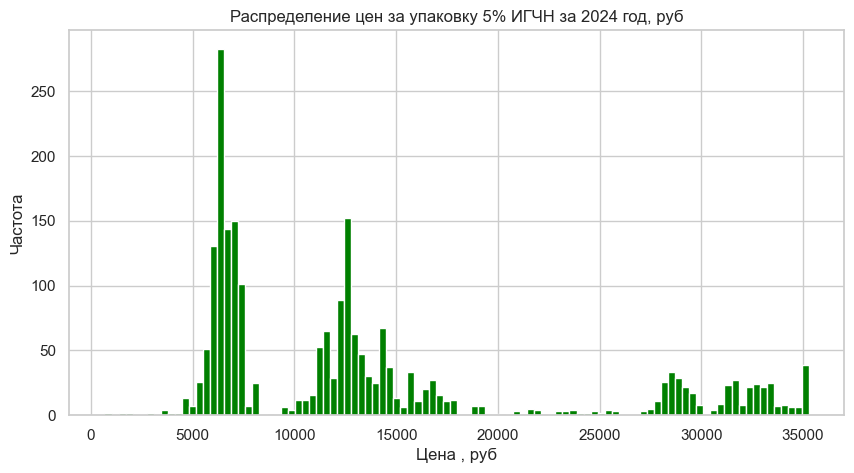

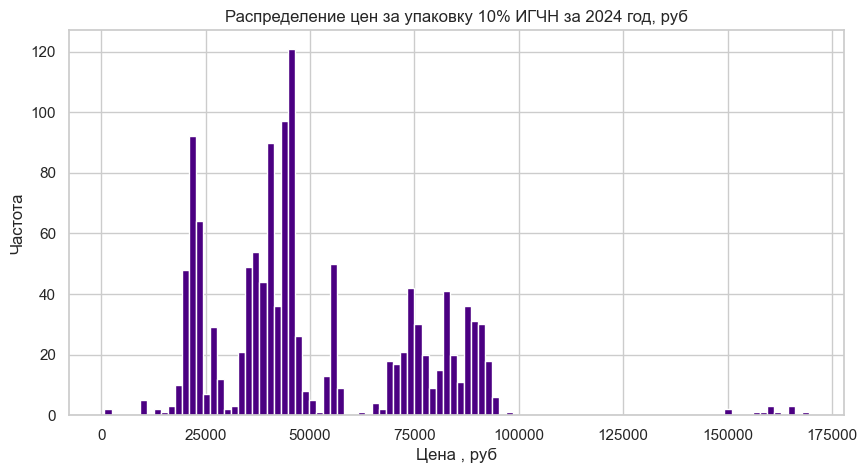

In [30]:

#  Распределение кол-ва аукционов в зависимости от цены с фильтром по % Дозировки 
plt.figure (figsize=(10,5))

plt.hist(df[(df['Год'] == 2024) & (df['Дозировка %'] == '5%')]['Цена за упаковку (контракт)'], bins=100, color='green')
plt.xlabel ('Цена , руб')
plt.ylabel ('Частота')
plt.title ('Распределение цен за упаковку 5% ИГЧН за 2024 год, руб');

plt.figure (figsize=(10,5))
plt.hist(df[(df['Год'] == 2024) & (df['Дозировка %'] == '10%')]['Цена за упаковку (контракт)'], bins=100, color='indigo')
plt.xlabel ('Цена , руб')
plt.ylabel ('Частота')
plt.title ('Распределение цен за упаковку 10% ИГЧН за 2024 год, руб');


In [31]:
df_group_price_2024_5proc=  df[(df['Год'] == 2024) & (df['Торговое наименование (контракт)'] != 'не определено') \
                                & ('df1[Дозировка + Фасовка (контракт)]' != 'не определено') \
                                & (df['Дозировка %'] == '5%')] \
                                .groupby(['Торговое наименование (контракт)','Дозировка + Фасовка (контракт)'], as_index=False).agg({'Цена за упаковку (контракт)': 'mean'})
df_group_price_2024_5proc = df_group_price_2024_5proc.rename (columns={'Цена за упаковку (контракт)': 'Ср. цена'}).sort_values(by=['Ср. цена'],ascending=False)
df_group_price_2024_5proc

,Торговое наименование (контракт),Дозировка + Фасовка (контракт),Ср. цена
5,Иммуноглобулин Сигардис МТ,5% 100 мл №1,30023.94
2,ИГЧН,5% 50 мл №1,15562.38
6,Иммуноглобулин Сигардис МТ,5% 50 мл №1,14072.62
3,Имбиоглобулин,5% 50 мл №1,12732.01
0,Габриглобин-IgG,5% 50 мл №1,12651.59
4,Иммуновенин,5% 25 мл №1,6576.33
1,ИГЧН,5% 25 мл №1,6463.09


In [32]:
df_group_price_2024_10proc=  df[(df['Год'] == 2024) & (df['Торговое наименование (контракт)'] != 'не определено') \
                                & ('df1[Дозировка + Фасовка (контракт)]' != 'не определено') \
                                & (df['Дозировка %'] == '10%')] \
                                .groupby(['Торговое наименование (контракт)','Дозировка + Фасовка (контракт)'], as_index=False).agg({'Цена за упаковку (контракт)': 'mean'})
df_group_price_2024_10proc = df_group_price_2024_10proc.rename (columns={'Цена за упаковку (контракт)': 'Ср. цена'}).sort_values(by=['Ср. цена'],ascending=False)
df_group_price_2024_10proc

,Торговое наименование (контракт),Дозировка + Фасовка (контракт),Ср. цена
3,ПАНЗИГА,10% 300 мл №1,160218.46
5,Привиджен,10% 100 мл №1,79467.46
2,ПАНЗИГА,10% 100 мл №1,55350.33
7,Привиджен,10% 50 мл №1,41255.18
0,БиоГам,10% 50 мл №1,39806.27
4,ПАНЗИГА,10% 50 мл №1,27720.49
1,ИГЧН,10% 50 мл №1,25551.63
6,Привиджен,10% 25 мл №1,21683.85


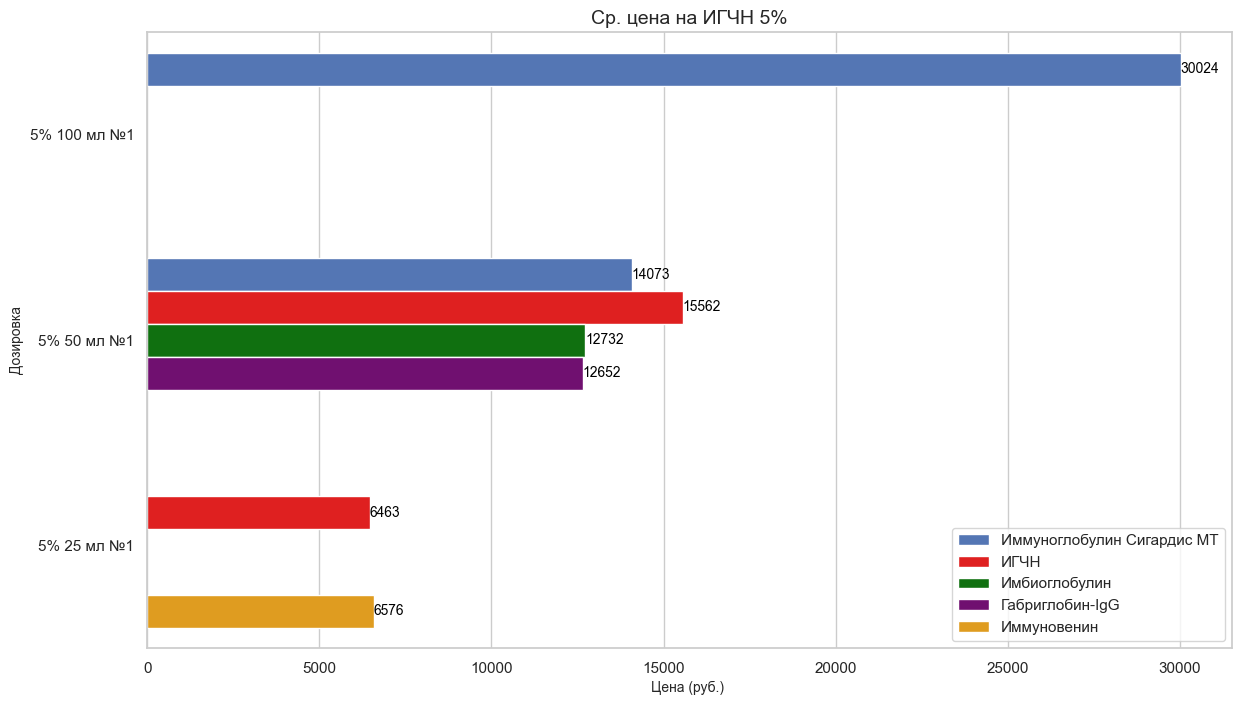

In [33]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(14, 8))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Ср. цена', y='Дозировка + Фасовка (контракт)', hue='Торговое наименование (контракт)', data=df_group_price_2024_5proc,orient='h', palette=['#4472C4','Red','Green','Purple','Orange'])
# Заголовок
plt.title( 'Ср. цена на ИГЧН 5%', fontsize=14)
# Название оси X
plt.xlabel( 'Цена (руб.) ', fontsize=10)
# Название оси Y
plt.ylabel( 'Дозировка', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[2], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[3], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[4], fontsize=10, label_type='edge', color='black', fmt='%.0f')

# Место размещения легенды
plt.legend(loc=4)
plt.show()

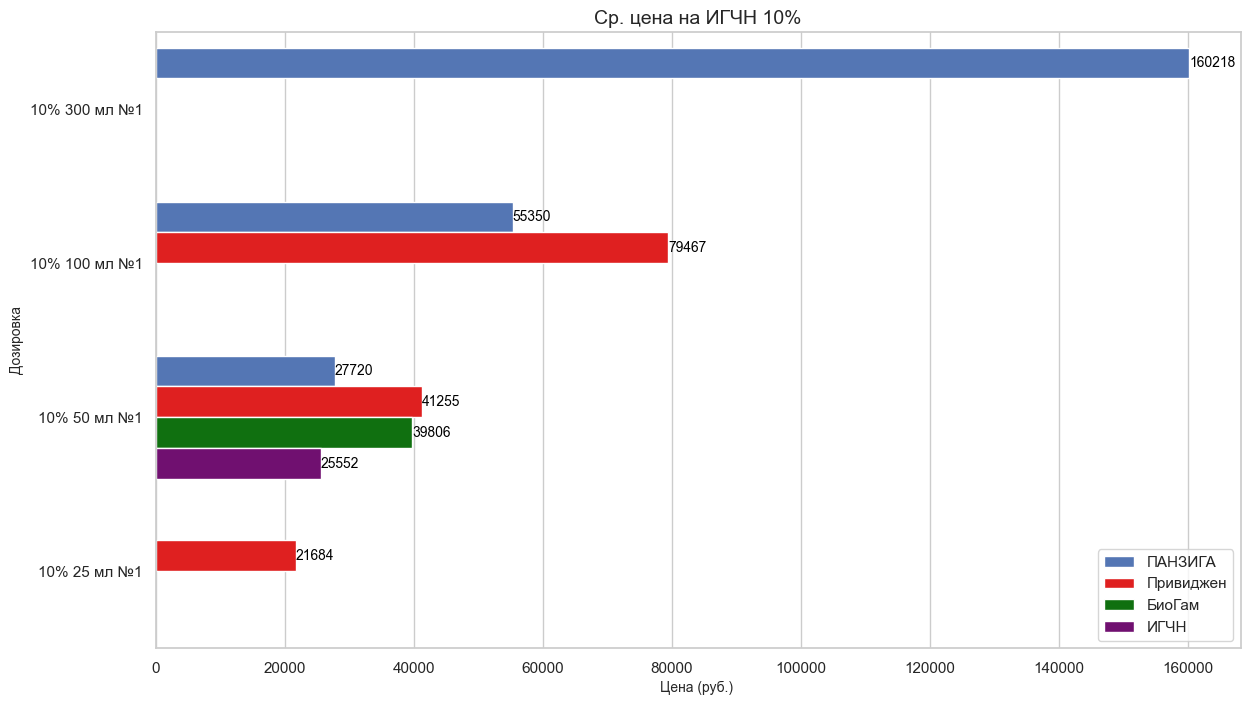

In [34]:
# Задаем размер графика
fig, ax = plt.subplots(figsize=(14, 8))
# Фон
sns.set_theme(style="whitegrid")
sns.barplot(x='Ср. цена', y='Дозировка + Фасовка (контракт)', hue='Торговое наименование (контракт)', data=df_group_price_2024_10proc,orient='h', palette=['#4472C4','Red','Green','Purple'])
# Заголовок
plt.title( 'Ср. цена на ИГЧН 10%', fontsize=14)
# Название оси X
plt.xlabel( 'Цена (руб.) ', fontsize=10)
# Название оси Y
plt.ylabel( 'Дозировка', fontsize=10)
# Подписи столбцов
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[2], fontsize=10, label_type='edge', color='black', fmt='%.0f')
ax.bar_label(ax.containers[3], fontsize=10, label_type='edge', color='black', fmt='%.0f')
# Место размещения легенды
plt.legend(loc=4)
plt.show()

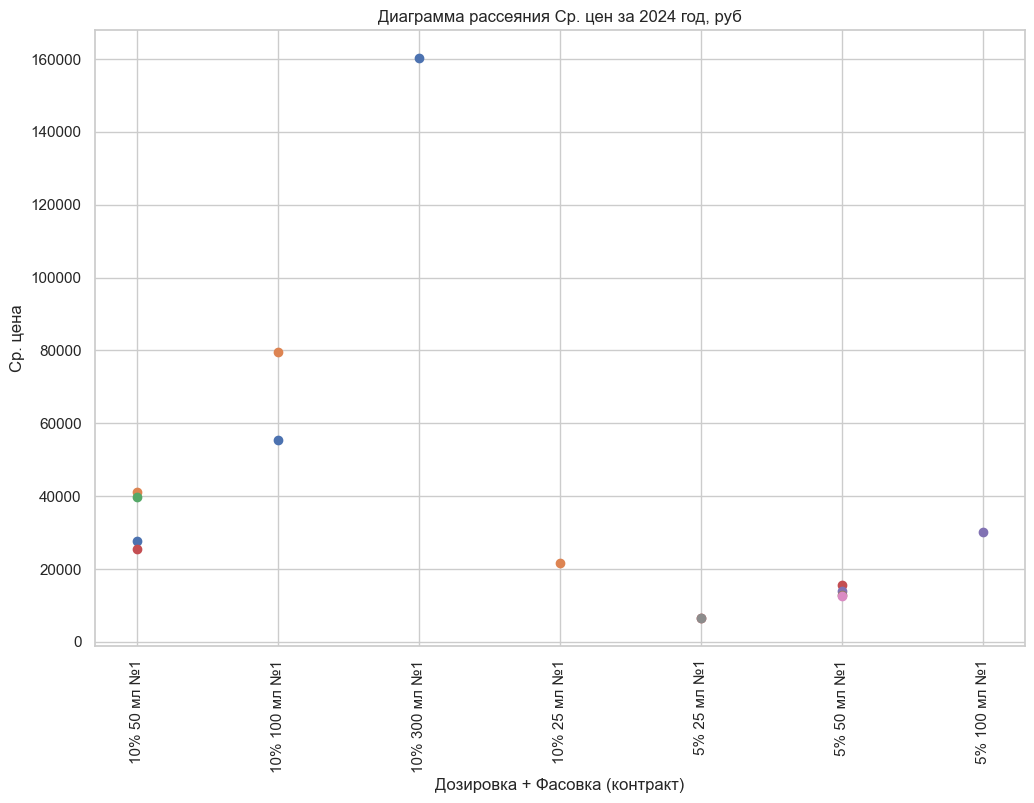

In [35]:
colors = {
        'ПАНЗИГА':'green',
        'Привиджен':'orange',
        'БиоГам':'blue',
        'ИГЧН':'cian',
        'Иммуноглобулин Сигардис МТ': 'purple',
        'Имбиоглобулин' :'yellow',
        'Габриглобин-IgG': 'red', 
        'Иммуновенин': 'pink'}

fig, ax = plt.subplots(figsize=(12, 8))
for tn in colors:
    color = colors[tn]
    data = pd.concat([df_group_price_2024_10proc, df_group_price_2024_5proc],ignore_index=True).sort_values(by=['Ср. цена'])
    data = data[data['Торговое наименование (контракт)'] == tn]
    plt.scatter(data['Дозировка + Фасовка (контракт)'], data['Ср. цена'])
plt.ylabel ('Ср. цена')
plt.xlabel ('Дозировка + Фасовка (контракт)')
plt.xticks (rotation= 90 )
plt.grid (True)

plt.title ('Диаграмма рассеяния Ср. цен за 2024 год, руб')
plt.show()

([0, 1, 2],
 [Text(0, 0, '5% 25 мл №1'),
  Text(1, 0, '5% 100 мл №1'),
  Text(2, 0, '5% 50 мл №1')])

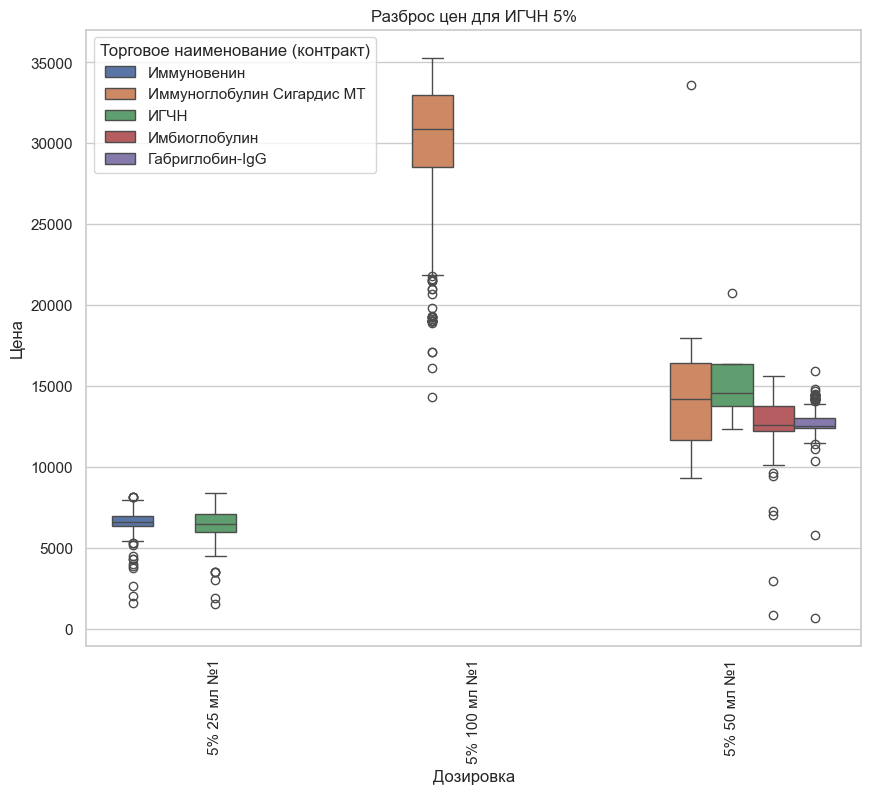

In [36]:
# Боксплоты  средних цен с учетом выбросов для ИГЧН 5%
data_price_5 = df[(df['Торговое наименование (контракт)'] != 'не определено') & 
                  (df['Дозировка + Фасовка (контракт)'] != 'не определено') & 
                  (df['Дозировка %'] == '5%') &
                  (df['Год'] == 2024)]

# Создание боксплота
plt.figure(figsize=(10, 8))
sns.boxplot(x='Дозировка + Фасовка (контракт)', y='Цена за упаковку (контракт)',hue='Торговое наименование (контракт)', data=data_price_5)

# Настройка графика
plt.title('Разброс цен для ИГЧН 5%')
plt.xlabel('Дозировка')
plt.ylabel('Цена')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, '10% 50 мл №1'),
  Text(1, 0, '10% 25 мл №1'),
  Text(2, 0, '10% 100 мл №1'),
  Text(3, 0, '10% 300 мл №1')])

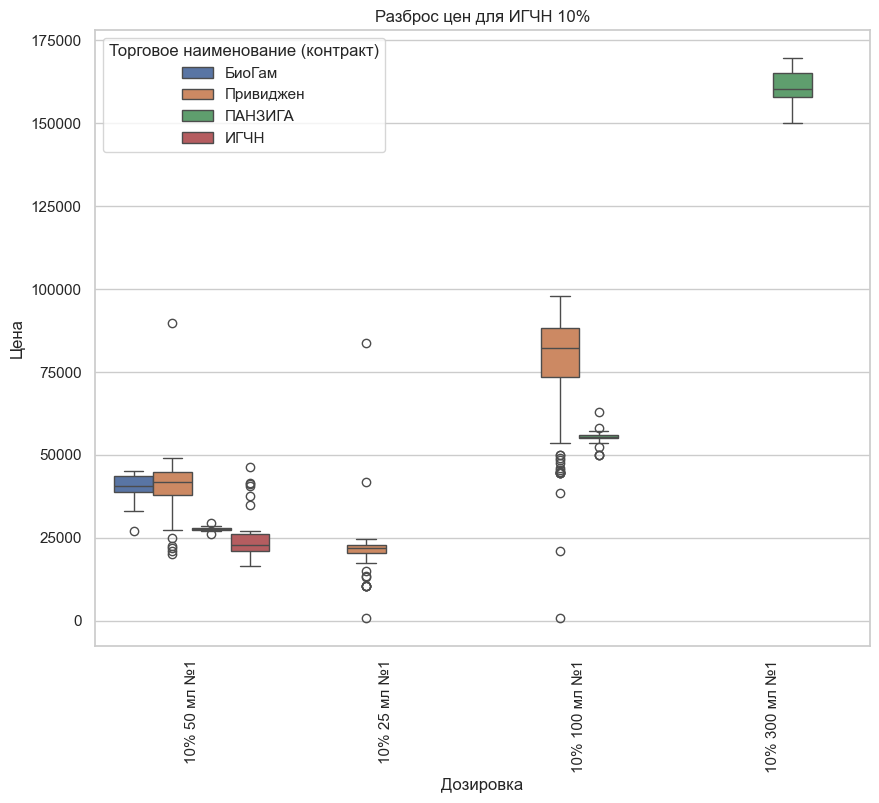

In [37]:
# Боксплоты  средних цен с учетом выбросов для ИГЧН 10%
data_price_10 = df[(df['Торговое наименование (контракт)'] != 'не определено') & 
                  (df['Дозировка + Фасовка (контракт)'] != 'не определено') & 
                  (df['Дозировка %'] == '10%') &
                  (df['Год'] == 2024)]

# Создание боксплота
plt.figure(figsize=(10, 8))
sns.boxplot(x='Дозировка + Фасовка (контракт)', y='Цена за упаковку (контракт)',hue='Торговое наименование (контракт)', data=data_price_10)

# Настройка графика
plt.title('Разброс цен для ИГЧН 10%')
plt.xlabel('Дозировка')
plt.ylabel('Цена')
plt.xticks(rotation=90)